# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [138]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import os

In [139]:
sys.path.append(os.path.join(".."))
from api_keys import api_key

In [140]:

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"



## Generate Cities List

In [141]:
# List for holding lat_lngs and cities

#data_dict = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed":[]}
data_dict = {"City":[],"Country":[],"Lat":[],"Lng":[]}
# Create a set of random lat and lng combinations
data_dict["Lat"] = np.random.uniform(low=-90.000, high=90.000, size=1500)
data_dict["Lng"] = np.random.uniform(low=-180.000, high=180.000, size=1500)


# Identify nearest city for each lat, lng combination
for idx in range(1500):
    data_dict["City"].append(citipy.nearest_city(data_dict["Lat"][idx], data_dict["Lng"][idx]).city_name)
    data_dict["Country"].append(citipy.nearest_city(data_dict["Lat"][idx], data_dict["Lng"][idx]).country_code)

data_dict=pd.DataFrame(data_dict)[["City","Country"]].drop_duplicates()
    
# Print the city count to confirm sufficient count

In [142]:
query_url="http://api.openweathermap.org/data/2.5/weather?"
data_dict["Cloudiness"]=0.0
data_dict["Date"]=0
data_dict["Humidity"]=0.0
data_dict["Lat"]=0.0
data_dict["Lng"]=0.0
data_dict["Max Temp"]=0.0
data_dict["Wind Speed"]=0.0

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [143]:
valid_index=[]
for i in data_dict.index:
    response = requests.get(f"{query_url}appid={api_key}&q={data_dict['City'][i]},{data_dict['Country'][i]}").json()
    if response['cod']=='404':
        print(f"City not found; Skipping Record {i+1} | {data_dict['City'][i]}")
        continue
    else:
        print(f"Processing Record {i+1} | {data_dict['City'][i]}")
        valid_index.append(i)
        data_dict.loc[i,"Cloudiness"]=response['clouds']['all']
        data_dict.loc[i,"Date"]=response['dt']
        data_dict.loc[i,"Humidity"]=response['main']['humidity']
        data_dict.loc[i,"Lat"]=response['coord']['lat']
        data_dict.loc[i,"Lng"]=response['coord']['lon']
        data_dict.loc[i,"Max Temp"]=response['main']['temp_max']
        data_dict.loc[i,"Wind Speed"]=response['wind']['speed']

Processing Record 1 | sangar
Processing Record 2 | viedma
Processing Record 3 | lebu
Processing Record 4 | iqaluit
Processing Record 5 | punta arenas
Processing Record 6 | hambantota
Processing Record 7 | saint-philippe
Processing Record 8 | georgetown
Processing Record 9 | pontian kecil
Processing Record 10 | atuona
Processing Record 11 | albany
Processing Record 12 | jiazi
Processing Record 13 | puerto narino
Processing Record 14 | asosa
Processing Record 16 | tiksi
Processing Record 17 | hermanus
Processing Record 18 | varhaug
Processing Record 19 | bluff
Processing Record 20 | port alfred
Processing Record 21 | kapaa
Processing Record 22 | hasaki
Processing Record 23 | bosaso
Processing Record 24 | souillac
Processing Record 25 | coquimbo
Processing Record 27 | saint george
Processing Record 29 | beringovskiy
Processing Record 30 | kristiansund
Processing Record 32 | busselton
Processing Record 33 | los llanos de aridane
Processing Record 34 | rikitea
Processing Record 35 | narsaq


Processing Record 414 | villa rica
Processing Record 415 | bubaque
Processing Record 419 | cervo
City not found; Skipping Record 424 | bac lieu
Processing Record 428 | labuhan
Processing Record 429 | palauig
City not found; Skipping Record 431 | sentyabrskiy
Processing Record 432 | kalaleh
Processing Record 434 | longyearbyen
City not found; Skipping Record 435 | asht
Processing Record 436 | hami
Processing Record 437 | luang prabang
Processing Record 439 | tuatapere
Processing Record 440 | ambilobe
City not found; Skipping Record 441 | tari
Processing Record 443 | oeiras do para
Processing Record 445 | matagami
Processing Record 446 | gigmoto
Processing Record 451 | keti bandar
Processing Record 453 | general teran
Processing Record 455 | bintulu
Processing Record 458 | isangel
Processing Record 460 | aboisso
Processing Record 461 | san vicente
Processing Record 463 | evensk
Processing Record 464 | caraquet
Processing Record 468 | kodiak
Processing Record 469 | la ronge
Processing Rec

Processing Record 1027 | kysyl-syr
Processing Record 1029 | sussex
Processing Record 1031 | sri aman
City not found; Skipping Record 1033 | kunya
Processing Record 1034 | khartoum
Processing Record 1035 | maragogi
Processing Record 1036 | caetite
Processing Record 1037 | chernyshevskiy
Processing Record 1038 | oranjemund
Processing Record 1039 | bathsheba
Processing Record 1040 | ulaangom
Processing Record 1045 | male
Processing Record 1047 | ust-nera
Processing Record 1050 | pathein
Processing Record 1057 | saint-louis
Processing Record 1059 | bukama
Processing Record 1061 | sherlovaya gora
Processing Record 1063 | virden
Processing Record 1065 | srednekolymsk
City not found; Skipping Record 1067 | freetown
Processing Record 1073 | san ignacio
Processing Record 1078 | kiruna
Processing Record 1080 | baculin
Processing Record 1083 | whitianga
Processing Record 1086 | khokhlovo
Processing Record 1089 | tyukalinsk
Processing Record 1090 | broken hill
Processing Record 1091 | nantucket
Pr

In [144]:
data_dict=data_dict.loc[valid_index,:]


In [145]:
data_dict.shape

(569, 9)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [146]:
data_dict.to_csv("./City_Data.csv")
data_dict.head()

,City,Country,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,sangar,ru,8.0,1551672953,60.0,63.92,127.47,251.112,0.46
1,viedma,ar,0.0,1551672957,87.0,-40.81,-62.99,290.462,3.96
2,lebu,cl,44.0,1551672957,96.0,-37.62,-73.65,286.512,2.51
3,iqaluit,ca,40.0,1551672769,75.0,63.75,-68.52,248.150,1.00
4,punta arenas,cl,75.0,1551672793,80.0,-53.16,-70.91,278.150,5.70


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

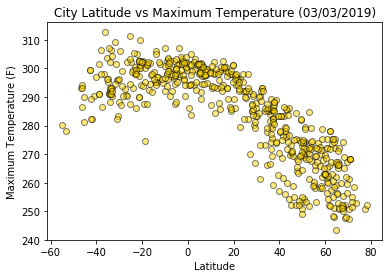

In [147]:
plt.scatter(data_dict[["Lat"]], data_dict[["Max Temp"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Maximum Temperature (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (F)")
plt.savefig("./Images/Latitude vs Temperature.png",dpi=256,figsize=(18,11))

#### Latitude vs. Humidity Plot

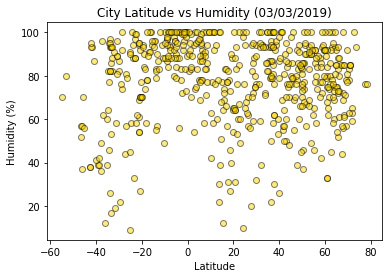

In [148]:
plt.scatter(data_dict[["Lat"]], data_dict[["Humidity"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Humidity (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("./Images/Latitude vs Humidity.png",dpi=256,figsize=(18,11))

#### Latitude vs. Cloudiness Plot

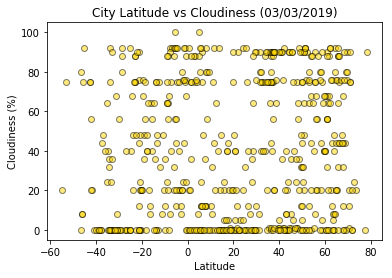

In [149]:
plt.scatter(data_dict[["Lat"]], data_dict[["Cloudiness"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Cloudiness (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("./Images/Latitude vs Cloudiness.png",dpi=256,figsize=(18,11))

#### Latitude vs. Wind Speed Plot

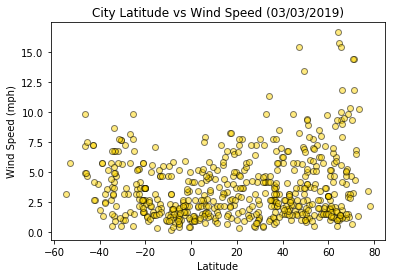

In [150]:
plt.scatter(data_dict[["Lat"]], data_dict[["Wind Speed"]], marker="o", facecolors="gold", edgecolors="black", 
            alpha=.5, linewidths=1)
#plot title, axes labels
plt.title("City Latitude vs Wind Speed (03/03/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("./Images/Latitude vs Wind Speed.png",dpi=256,figsize=(18,11))